In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import networkx as nx
import matplotlib.colors as mcolors
# warnings.simplefilter(action='ignore', category=FutureWarning)
# pd.set_option('display.max_rows', None)  # To display all rows
# pd.set_option('display.max_columns', None)  # To display all columns
import glob as glob
import math
from datetime import datetime 
import seaborn as sns
import pingouin as pg


In [2]:
#load a4 and adni ml ready data csvs 
# adni = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/ADNI_ML_DATA.csv')
# a4 = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/A4_ML_DATA.csv')

In [3]:
adni = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/adni_MMSE_29Apr2024.csv')
a4 = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/A4_MMSE_PRV2_29Apr2024.csv')

In [4]:
print(a4.columns)

Index(['BID', 'VISCODE', 'DONE', 'NDREASON', 'WORDLIST', 'MMDATE', 'MMYEAR',
       'MMMONTH', 'MMDAY', 'MMSEASON', 'MMHOSPIT', 'MMFLOOR', 'MMCITY',
       'MMAREA', 'MMSTATE', 'MMBALL', 'MMFLAG', 'MMTREE', 'MMTRIALS', 'MMDLTR',
       'MMLLTR', 'MMRLTR', 'MMOLTR', 'MMWLTR', 'MMWORLD', 'MMBALLDL',
       'MMFLAGDL', 'MMTREEDL', 'MMWATCH', 'MMPENCIL', 'MMREPEAT', 'MMHAND',
       'MMFOLD', 'MMONFLR', 'MMREAD', 'MMWRITE', 'MMDRAW', 'MMSCORE',
       'update_stamp'],
      dtype='object')


In [5]:
adni.drop(columns=['ID'],inplace=True)
print(adni.columns)

Index(['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'DONE',
       'NDREASON', 'SOURCE', 'DATE', 'MMDATE', 'MMYEAR', 'MMMONTH', 'MMDAY',
       'MMSEASON', 'MMHOSPIT', 'MMFLOOR', 'MMCITY', 'MMAREA', 'MMSTATE',
       'WORDLIST', 'WORD1', 'WORD2', 'WORD3', 'MMTRIALS', 'MMD', 'MML', 'MMR',
       'MMO', 'MMW', 'MMLTR1', 'MMLTR2', 'MMLTR3', 'MMLTR4', 'MMLTR5',
       'MMLTR6', 'MMLTR7', 'WORLDSCORE', 'WORD1DL', 'WORD2DL', 'WORD3DL',
       'MMWATCH', 'MMPENCIL', 'MMREPEAT', 'MMHAND', 'MMFOLD', 'MMONFLR',
       'MMREAD', 'MMWRITE', 'MMDRAW', 'MMSCORE', 'SITEID', 'USERDATE',
       'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR',
       'update_stamp'],
      dtype='object')


In [6]:
#rename ID RID
a4.rename(columns={'BID': 'RID'}, inplace=True)

In [7]:
a4 = a4[['RID','MMSCORE']]
adni = adni[['RID','MMSCORE']]

In [8]:
print(adni)

         RID  MMSCORE
0          2     28.0
1          1     28.0
2          3     20.0
3          4     27.0
4          5     29.0
...      ...      ...
13249   6704     29.0
13250  10111     27.0
13251   5167     30.0
13252   6903     29.0
13253   6621     28.0

[13254 rows x 2 columns]


In [9]:
#scrape MMSE col from both and adni to demo data csv 
adni_demo = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/demographic_csvs/ADNI/adni_filtered_demo.csv')
a4_demo = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/demographic_csvs/A4/a4_filtered_demo.csv')

In [10]:
print(adni)

         RID  MMSCORE
0          2     28.0
1          1     28.0
2          3     20.0
3          4     27.0
4          5     29.0
...      ...      ...
13249   6704     29.0
13250  10111     27.0
13251   5167     30.0
13252   6903     29.0
13253   6621     28.0

[13254 rows x 2 columns]


In [11]:
print(a4_demo)

           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX
0    B10423472       2.0  78.25         2      19.0      5   1
1    B10693248       2.0  65.94         2      16.0      5   1
2    B10709603       1.0  74.15         2      18.0      5   1
3    B10795731       1.0  69.23         2      18.0      5   1
4    B10904689       2.0  68.21         2      13.0      5   1
..         ...       ...    ...       ...       ...    ...  ..
368  B99525373       2.0  67.00         2      20.0      5   1
369  B99649691       2.0  65.31         2      16.0      5   1
370  B99696480       2.0  74.41         2      12.0      5   1
371  B99860801       1.0  71.56         2      18.0      2   1
372  B99870985       1.0  71.32         2      14.0      5   1

[373 rows x 7 columns]


In [12]:
# adni_mmse = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/A4_MMSE_PRV2_29Apr2024.csv')
# a4_mmse = pd.read_csv('/home/mlauber/mci_mri_graph/data_paths_and_cleaning/data/ML_ready_data/adni_MMSE_29Apr2024.csv')

filter only matching RODs 

In [13]:
print(a4_demo)

           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX
0    B10423472       2.0  78.25         2      19.0      5   1
1    B10693248       2.0  65.94         2      16.0      5   1
2    B10709603       1.0  74.15         2      18.0      5   1
3    B10795731       1.0  69.23         2      18.0      5   1
4    B10904689       2.0  68.21         2      13.0      5   1
..         ...       ...    ...       ...       ...    ...  ..
368  B99525373       2.0  67.00         2      20.0      5   1
369  B99649691       2.0  65.31         2      16.0      5   1
370  B99696480       2.0  74.41         2      12.0      5   1
371  B99860801       1.0  71.56         2      18.0      2   1
372  B99870985       1.0  71.32         2      14.0      5   1

[373 rows x 7 columns]


In [14]:
#check for 31 
is_present = 10423472 in a4['RID'].values
print(is_present)

False


In [15]:
print(a4)

            RID  MMSCORE
0     B10018169     27.0
1     B10021023     30.0
2     B10048838     30.0
3     B10081264     29.0
4     B10082310     30.0
...         ...      ...
6769  B99957366     26.0
6770  B99968206     30.0
6771  B99971727     29.0
6772  B99980935     29.0
6773  B99987993     29.0

[6774 rows x 2 columns]


In [16]:
# Merge a4_demo with a4 on 'RID' column
a4_mmse_filtered = a4_demo.merge(a4[['RID', 'MMSCORE']], on='RID', how='inner')

# Print the resulting DataFrame
print(a4_mmse_filtered)


           RID  PTGENDER  PTAGE  PTETHNIC  PTEDUCAT PTRACE  DX  MMSCORE
0    B10423472       2.0  78.25         2      19.0      5   1     29.0
1    B10693248       2.0  65.94         2      16.0      5   1     29.0
2    B10709603       1.0  74.15         2      18.0      5   1     30.0
3    B10795731       1.0  69.23         2      18.0      5   1     28.0
4    B10904689       2.0  68.21         2      13.0      5   1     28.0
..         ...       ...    ...       ...       ...    ...  ..      ...
368  B99525373       2.0  67.00         2      20.0      5   1     28.0
369  B99649691       2.0  65.31         2      16.0      5   1     28.0
370  B99696480       2.0  74.41         2      12.0      5   1     25.0
371  B99860801       1.0  71.56         2      18.0      2   1     27.0
372  B99870985       1.0  71.32         2      14.0      5   1     26.0

[373 rows x 8 columns]


In [17]:
# Merge a4_demo with a4 on 'RID' column
adni_mmse_filtered = adni_demo.merge(adni[['RID', 'MMSCORE']], on='RID', how='inner')

In [18]:
#function to filter the latest visit of a df 
def filter_latest_visit(df):
    last_visit_df = df.groupby('RID').tail(1) #get the last occurance of that RID value 
    last_visit_df = last_visit_df.reset_index(drop=True)
    return last_visit_df

In [19]:
adni_mmse_filtered = filter_latest_visit(adni_mmse_filtered)
print(adni_mmse_filtered)

      RID  PTGENDER      PTAGE  PTETHNIC  PTEDUCAT  PTRACE  DX  MMSCORE
0      31       2.0  83.750000       2.0      18.0       5   2      NaN
1     112       1.0  76.666667       2.0      18.0       5   1     20.0
2     120       1.0  79.083333       2.0      20.0       5   2     29.0
3     210       2.0  78.500000       2.0      13.0       5   2     29.0
4     377       1.0  85.166667       2.0      16.0       5   2     30.0
..    ...       ...        ...       ...       ...     ...  ..      ...
393  7054       2.0  72.250000       2.0      18.0       5   2     27.0
394  7079       2.0  86.750000       2.0      18.0       4   1     27.0
395  7088       1.0  70.000000       2.0      16.0       5   1     25.0
396  7100       1.0  74.000000       2.0      16.0       4   3      NaN
397  7105       1.0  77.500000       1.0      18.0       6   2     24.0

[398 rows x 8 columns]


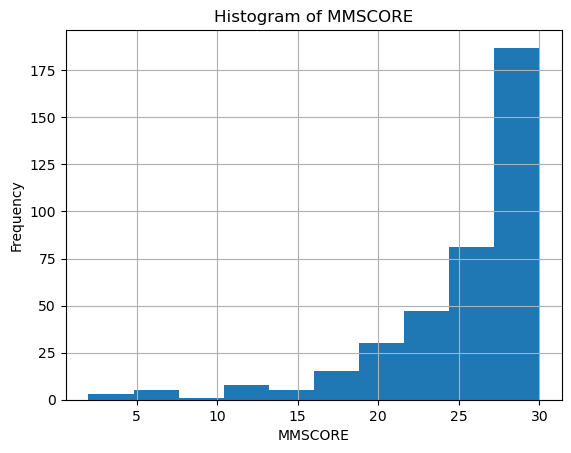

In [20]:
#histogram of mmse scores 
# Plot histogram of the MMSCORE column
adni_mmse_filtered['MMSCORE'].hist()

# Add labels and title
plt.xlabel('MMSCORE')
plt.ylabel('Frequency')
plt.title('Histogram of MMSCORE')

# Show the plot
plt.show()

In [21]:
#boxplot of MMSE in 3 CL groups 
adni_cent = pd.read_csv('../data/intermediate_data/adni/merged_adni_at_amy_pos_novol.csv')
a4_cent = pd.read_csv('../data/intermediate_data/a4/merged_a4_at_amypos_novol.csv')

In [22]:
adni_cent

,Unnamed: 0,RID,TRACER_x,CENTILOIDS,LONIUID,SITEID,PTID,SCANDATE,PROCESSDATE,TRACER_y,...,RIGHT_CEREBELLUM_CORTEX_SUVR,RIGHT_CEREBELLUM_WHITE_MATTER_SUVR,RIGHT_CEREBRAL_WHITE_MATTER_SUVR,RIGHT_CHOROID_PLEXUS_SUVR,RIGHT_HIPPOCAMPUS_SUVR,RIGHT_PALLIDUM_SUVR,RIGHT_PUTAMEN_SUVR,RIGHT_THALAMUS_PROPER_SUVR,RIGHT_VENTRALDC_SUVR,update_stamp
0,0,31,FBP,97.0,I1596172,23,023-S-0031,2019-04-23,2022-09-02,FTP,...,1.050,1.029,1.097,4.989,1.502,1.714,1.496,1.112,1.538,2023-07-25 09:32:18.0
1,1,112,FBP,89.0,I1600753,127,127-S-0112,2018-08-13,2022-09-02,FTP,...,1.042,1.195,1.346,1.631,1.618,1.794,1.932,1.430,1.475,2023-07-25 09:32:18.0
2,2,120,FBP,32.0,I1596585,27,027-S-0120,2017-09-13,2022-09-02,FTP,...,1.005,1.047,1.137,6.378,1.150,1.431,1.522,1.213,1.263,2023-07-25 09:32:18.0
3,3,210,FBP,54.0,I1599039,68,068-S-0210,2018-03-13,2022-09-02,FTP,...,0.980,1.013,1.080,3.649,1.128,1.771,1.399,1.201,1.385,2023-07-25 09:32:18.0
4,4,377,FBP,85.0,I1598072,37,037-S-0377,2019-06-05,2022-09-02,FTP,...,1.030,1.206,1.220,4.129,1.347,2.277,2.023,1.523,1.668,2023-07-25 09:32:18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,393,6580,FBB,142.0,I1603427,941,941-S-6580,2020-10-09,2022-11-18,FTP,...,0.978,1.040,1.065,3.945,1.263,1.685,1.698,1.241,1.356,2023-07-25 09:32:18.0
394,394,6581,FBB,28.0,I1603410,941,941-S-6581,2018-09-21,2022-09-02,FTP,...,0.988,1.105,1.095,5.059,1.220,2.001,1.651,1.171,1.372,2023-07-25 09:32:18.0
395,395,6586,FBB,40.0,I1638643,135,135-S-6586,2022-10-26,2023-03-14,FTP,...,1.016,0.958,1.003,1.728,0.989,1.752,1.799,0.994,1.313,2023-07-25 09:32:18.0
396,396,7100,FBB,50.0,I1634248,33,033-S-7100,2022-10-19,2023-02-15,FTP,...,1.031,1.028,1.001,6.548,1.279,1.327,1.232,1.056,1.298,2023-07-25 09:32:18.0


In [23]:
adni_cent_merge = adni_mmse_filtered.merge(adni_cent[['RID', 'CENTILOIDS']], on='RID', how='inner')

In [24]:
adni_cent_merge

,RID,PTGENDER,PTAGE,PTETHNIC,PTEDUCAT,PTRACE,DX,MMSCORE,CENTILOIDS
0,31,2.0,83.750000,2.0,18.0,5,2,NaN,97.0
1,112,1.0,76.666667,2.0,18.0,5,1,20.0,89.0
2,120,1.0,79.083333,2.0,20.0,5,2,29.0,32.0
3,210,2.0,78.500000,2.0,13.0,5,2,29.0,54.0
4,377,1.0,85.166667,2.0,16.0,5,2,30.0,85.0
...,...,...,...,...,...,...,...,...,...
393,7054,2.0,72.250000,2.0,18.0,5,2,27.0,75.0
394,7079,2.0,86.750000,2.0,18.0,4,1,27.0,39.0
395,7088,1.0,70.000000,2.0,16.0,5,1,25.0,108.0
396,7100,1.0,74.000000,2.0,16.0,4,3,NaN,50.0


In [25]:
#qcut 
#labels the quartiles, pandas category type 
#to save 
adni_cent_merge['quantile'] = pd.qcut(adni_cent_merge['CENTILOIDS'],3,labels=False)


In [26]:
adni_cent_merge

,RID,PTGENDER,PTAGE,PTETHNIC,PTEDUCAT,PTRACE,DX,MMSCORE,CENTILOIDS,quantile
0,31,2.0,83.750000,2.0,18.0,5,2,NaN,97.0,2
1,112,1.0,76.666667,2.0,18.0,5,1,20.0,89.0,1
2,120,1.0,79.083333,2.0,20.0,5,2,29.0,32.0,0
3,210,2.0,78.500000,2.0,13.0,5,2,29.0,54.0,0
4,377,1.0,85.166667,2.0,16.0,5,2,30.0,85.0,1
...,...,...,...,...,...,...,...,...,...,...
393,7054,2.0,72.250000,2.0,18.0,5,2,27.0,75.0,1
394,7079,2.0,86.750000,2.0,18.0,4,1,27.0,39.0,0
395,7088,1.0,70.000000,2.0,16.0,5,1,25.0,108.0,2
396,7100,1.0,74.000000,2.0,16.0,4,3,NaN,50.0,0


In [32]:
#anova pingouin 
# Perform ANOVA
anova_result = pg.anova(data=adni_cent_merge, dv='MMSCORE', between='quantile')

# Print ANOVA result
print(anova_result)
#they are significantly different, moderate  

     Source  ddof1  ddof2          F         p-unc       np2
0  quantile      2    379  20.026161  5.398791e-09  0.095578


<Axes: xlabel='quantile', ylabel='MMSCORE'>

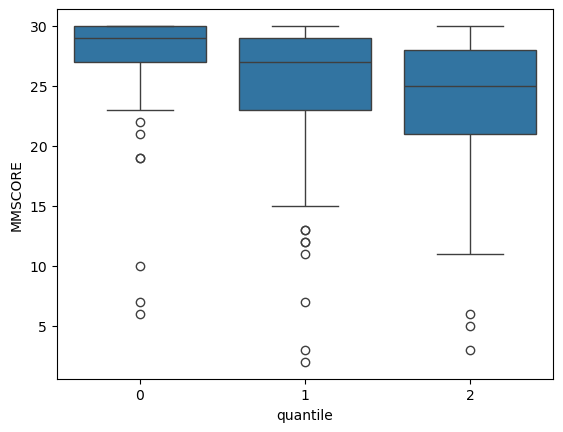

In [27]:
sns.boxplot(adni_cent_merge,x='quantile',y='MMSCORE')


<Axes: xlabel='quantile', ylabel='PTAGE'>

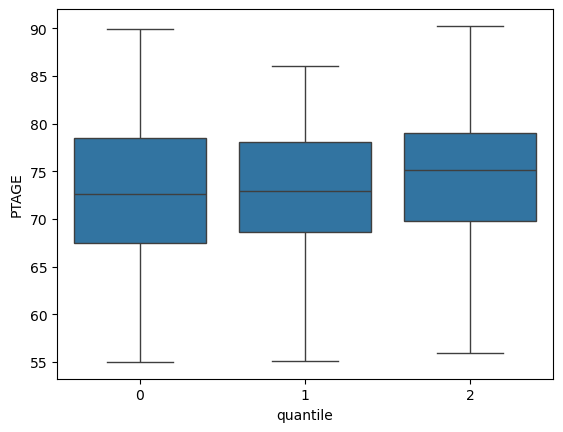

In [29]:
#boxplot of age in the three groups 

sns.boxplot(adni_cent_merge,x='quantile',y='PTAGE')

In [30]:
#sig test 


371 out of 373 a4 have mmse score and 332 out of 398 adni have mmse score availible 

In [31]:
adni_mmse_filtered.to_csv('../data/demographic_csvs/ADNI/adni_filtered_mmse.csv')
a4_mmse_filtered.to_csv('../data/demographic_csvs/A4/a4_filtered_mmse.csv')